# Analysis & Preprocessing)

In [6]:
import pandas as pd
import numpy as np
df=pd.read_csv('Data.csv')
df[27:33].round(2)

,Wind Power,Amount of Cargo,Auxiliary Engine Power,Main Engine Power,LOA,Breath,Draught,Light Weight,Month,Latitude,Longitude,Speed,Consumption_LSHFO
27,6,50999.82,770,9480.0,190.0,32.26,12.54,11149.4,January,25.91,123.07,10.04,24.3
28,5,50999.82,770,9480.0,190.0,32.26,12.54,11149.4,January,29.66,123.65,9.58,24.2
29,4,50999.82,770,9480.0,190.0,32.26,12.54,11149.4,January,33.54,123.75,10.17,24.5
30,4,50999.82,770,9480.0,190.0,32.26,12.54,11149.4,January,32.88,120.96,9.89,15.1
31,3,50999.82,770,9480.0,190.0,32.26,12.54,11149.4,January,33.76,120.84,0.00,2.8
32,3,50999.82,770,9480.0,190.0,32.26,12.54,11149.4,January,33.76,120.84,0.00,0.3


In [ ]:
df.shape

(10422, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10422 entries, 0 to 10421
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Wind Power              10422 non-null  int64  
 1   Amount of Cargo         10422 non-null  float64
 2   Auxiliary Engine Power  10422 non-null  int64  
 3   Main Engine Power       10422 non-null  float64
 4   LOA                     10422 non-null  float64
 5   Breath                  10422 non-null  float64
 6   Draught                 10422 non-null  float64
 7   Light Weight            10422 non-null  float64
 8   Month                   10422 non-null  object 
 9   Latitude                10422 non-null  float64
 10  Longitude               10422 non-null  float64
 11  Speed                   10422 non-null  float64
 12  Consumption_LSHFO       10422 non-null  float64
dtypes: float64(10), int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
df.columns

Index(['Wind Power', 'Amount of Cargo', 'Auxiliary Engine Power',
       'Main Engine Power', 'LOA', 'Breath', 'Draught', 'Light Weight',
       'Month', 'Latitude', 'Longitude', 'Speed', 'Consumption_LSHFO'],
      dtype='object')

In [ ]:
df.describe().round(2)

,Wind Power,Amount of Cargo,Auxiliary Engine Power,Main Engine Power,LOA,Breath,Draught,Light Weight,Latitude,Longitude,Speed,Consumption_LSHFO
count,10422.00,10422.00,10422.00,10422.00,10422.00,10422.00,10422.00,10422.00,10422.00,10422.00,10422.00,10422.00
mean,3.23,24397.11,691.03,9325.64,203.27,32.26,13.03,11231.75,19.27,67.89,3.78,10.08
std,1.13,25200.32,89.28,878.97,16.98,0.00,0.88,661.01,14.35,34.12,5.11,10.63
min,0.00,0.00,420.00,5994.00,189.99,32.25,10.70,10230.33,-36.06,-49.20,0.00,0.01
25%,3.00,0.00,640.00,9480.00,189.99,32.26,12.49,10357.59,11.54,55.96,0.00,1.80
50%,3.00,15182.00,720.00,9480.00,190.00,32.26,12.54,11167.30,26.04,56.40,0.00,3.30
75%,4.00,50499.19,770.00,9480.00,225.00,32.26,14.00,11945.00,27.10,96.93,9.79,23.10
max,9.00,85732.00,770.00,10200.00,225.00,32.26,14.22,12202.80,45.13,126.13,19.39,34.10


In [ ]:
from _plotly_utils.colors.colorbrewer import Oranges
from _plotly_utils.colors.sequential import Greens
import plotly.express as px

fig = px.scatter_geo(df, lat='Latitude', lon='Longitude',
                     color='Consumption_LSHFO',
                     hover_name='Consumption_LSHFO',
                     size='Consumption_LSHFO',
                     projection="natural earth",size_max=7,width=950,height=600)

fig.show()

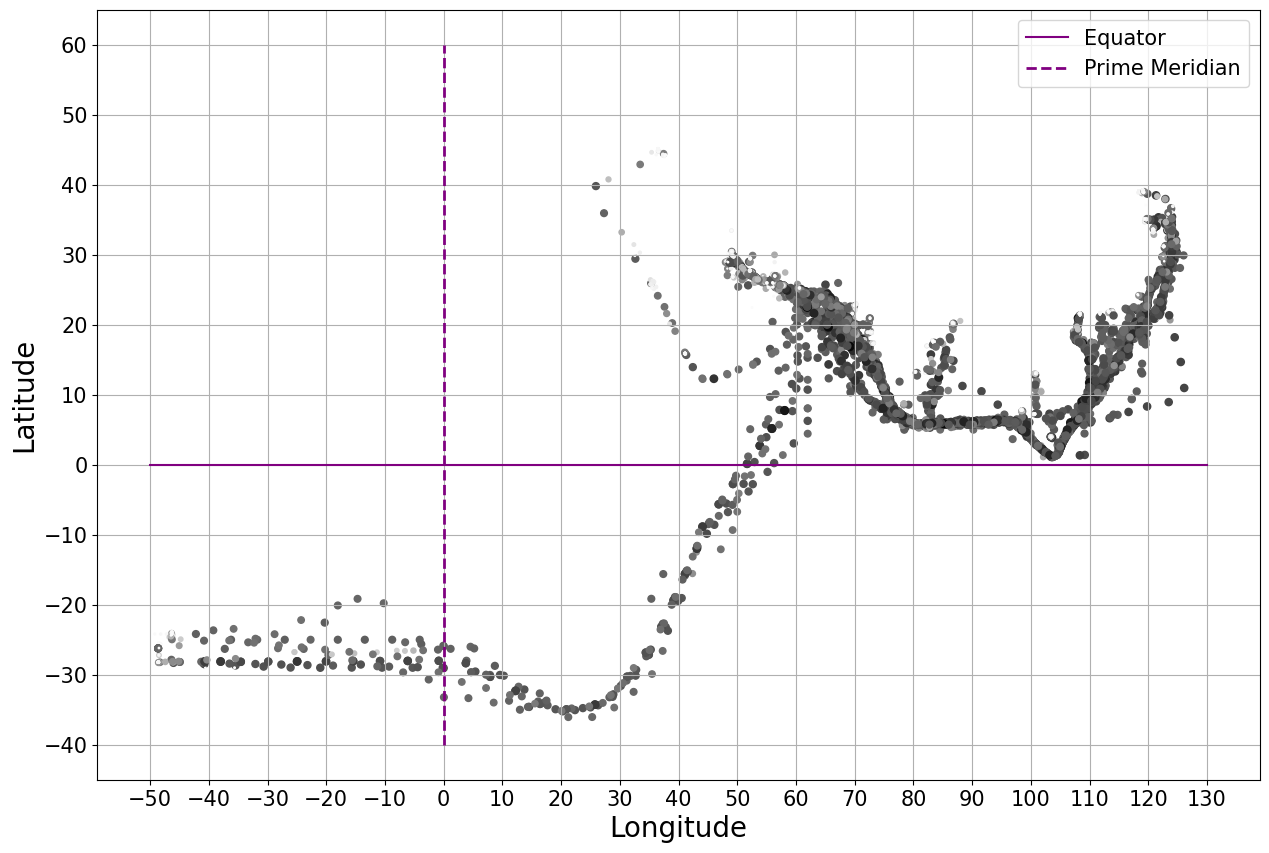

In [ ]:
from matplotlib import pyplot as plt
fig , ax = plt.subplots(figsize=(15,10))
D1=[-50,130]
R1=[0,0]
plt.plot(D1,R1,color='purple')
D2=[0,0]
R2=[-40,60]
plt.plot(D2,R2,color='purple',linestyle='--',linewidth=2)
plt.legend(['Equator','Prime Meridian'],fontsize=15)
ax.scatter(df['Longitude'],df['Latitude'] ,c=df['Consumption_LSHFO'],s=df['Consumption_LSHFO'],cmap='Greys')
ax.set_xlabel('Longitude',size=20)
ax.set_ylabel('Latitude',size=20)
plt.xticks(np.arange(-50,140,10),fontsize=15)
plt.yticks(np.arange(-40,70,10),fontsize=15)
plt.grid()
plt.show()

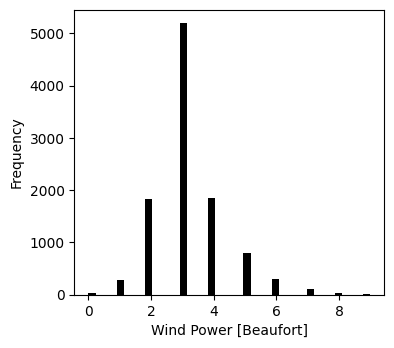

In [ ]:
plt.figure(figsize=(4,3.7))
plt.hist(df['Wind Power'],bins=40,color='black')
plt.xlabel('Wind Power [Beaufort]',size=10)
plt.ylabel('Frequency',size=10)
plt.show()

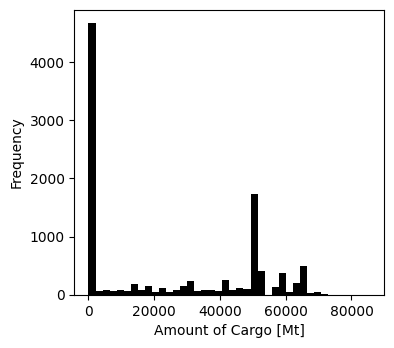

In [ ]:
plt.figure(figsize=(4,3.7))
plt.hist(df['Amount of Cargo'],bins=40,color='black')
plt.xlabel('Amount of Cargo [Mt]',size=10)
plt.ylabel('Frequency',size=10)
plt.show()

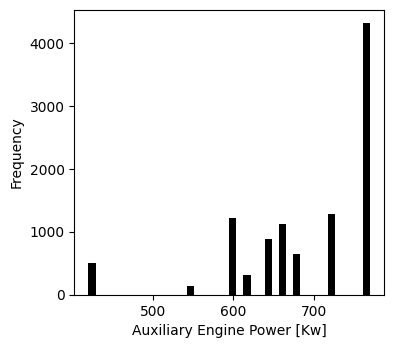

In [ ]:
plt.figure(figsize=(4,3.7))
plt.hist(df['Auxiliary Engine Power'],bins=40,color='black')
plt.xlabel('Auxiliary Engine Power [Kw]',size=10)
plt.ylabel('Frequency',size=10)
plt.show()

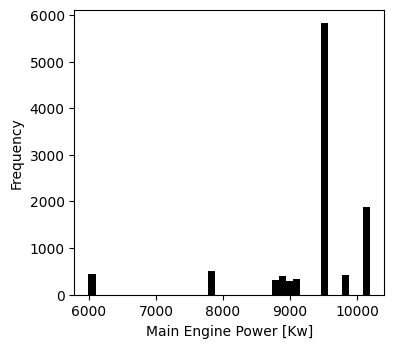

In [ ]:
plt.figure(figsize=(4,3.7))
plt.hist(df['Main Engine Power'],bins=40,color='black')
plt.xlabel('Main Engine Power [Kw]',size=10)
plt.ylabel('Frequency',size=10)
plt.show()

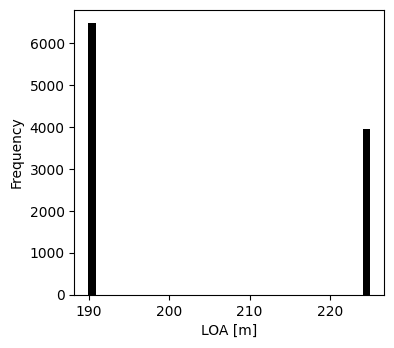

In [ ]:
plt.figure(figsize=(4,3.7))
plt.hist(df['LOA'],bins=40,color='black')
plt.ylabel('Frequency',size=10)
plt.xlabel('LOA [m]',size=10)
plt.show()

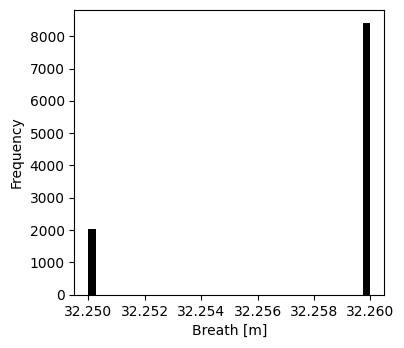

In [ ]:
plt.figure(figsize=(4,3.7))
plt.hist(df['Breath'],bins=40,color='black')
plt.xlabel('Breath [m]',size=10)
plt.ylabel('Frequency',size=10)
plt.show()

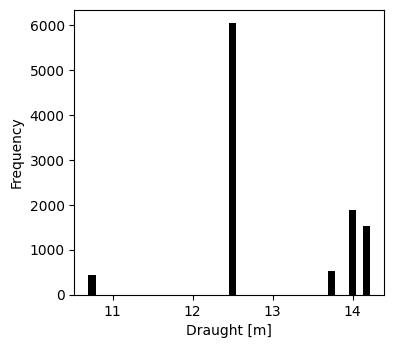

In [ ]:
plt.figure(figsize=(4,3.7))
plt.hist(df['Draught'],bins=40,color='black')
plt.xlabel('Draught [m]',size=10)
plt.ylabel('Frequency',size=10)
plt.show()

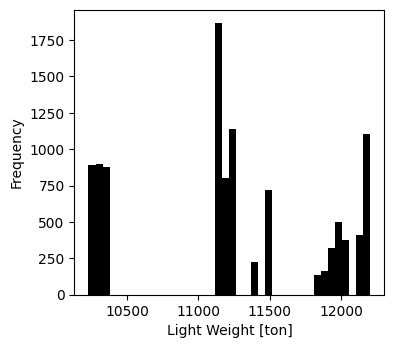

In [ ]:
plt.figure(figsize=(4,3.7))
plt.hist(df['Light Weight'],bins=40,color='black')
plt.xlabel('Light Weight [ton]',size=10)
plt.ylabel('Frequency',size=10)
plt.show()

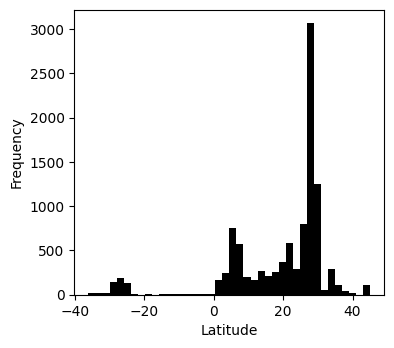

In [ ]:
plt.figure(figsize=(4,3.7))
plt.hist(df['Latitude'],bins=40,color='black')
plt.xlabel('Latitude',size=10)
plt.ylabel('Frequency',size=10)
plt.show()

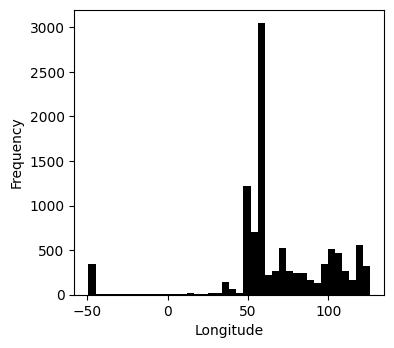

In [ ]:
plt.figure(figsize=(4,3.7))
plt.hist(df['Longitude'],bins=40,color='black')
plt.xlabel('Longitude',size=10)
plt.ylabel('Frequency',size=10)
plt.show()

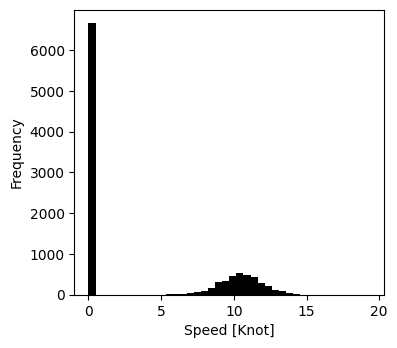

In [ ]:
plt.figure(figsize=(4,3.7))
plt.hist(df['Speed'],bins=40,color='black')
plt.xlabel('Speed [Knot]',size=10)
plt.ylabel('Frequency',size=10)
plt.show()

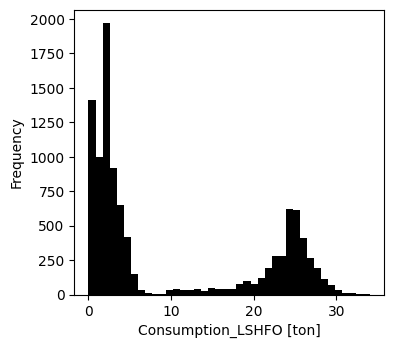

In [ ]:
plt.figure(figsize=(4,3.7))
plt.hist(df['Consumption_LSHFO'],bins=40,color='black')
plt.xlabel('Consumption_LSHFO [ton]',size=10)
plt.ylabel('Frequency',size=10)
plt.show()

<ipython-input-20-91c37756e98f>:6: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



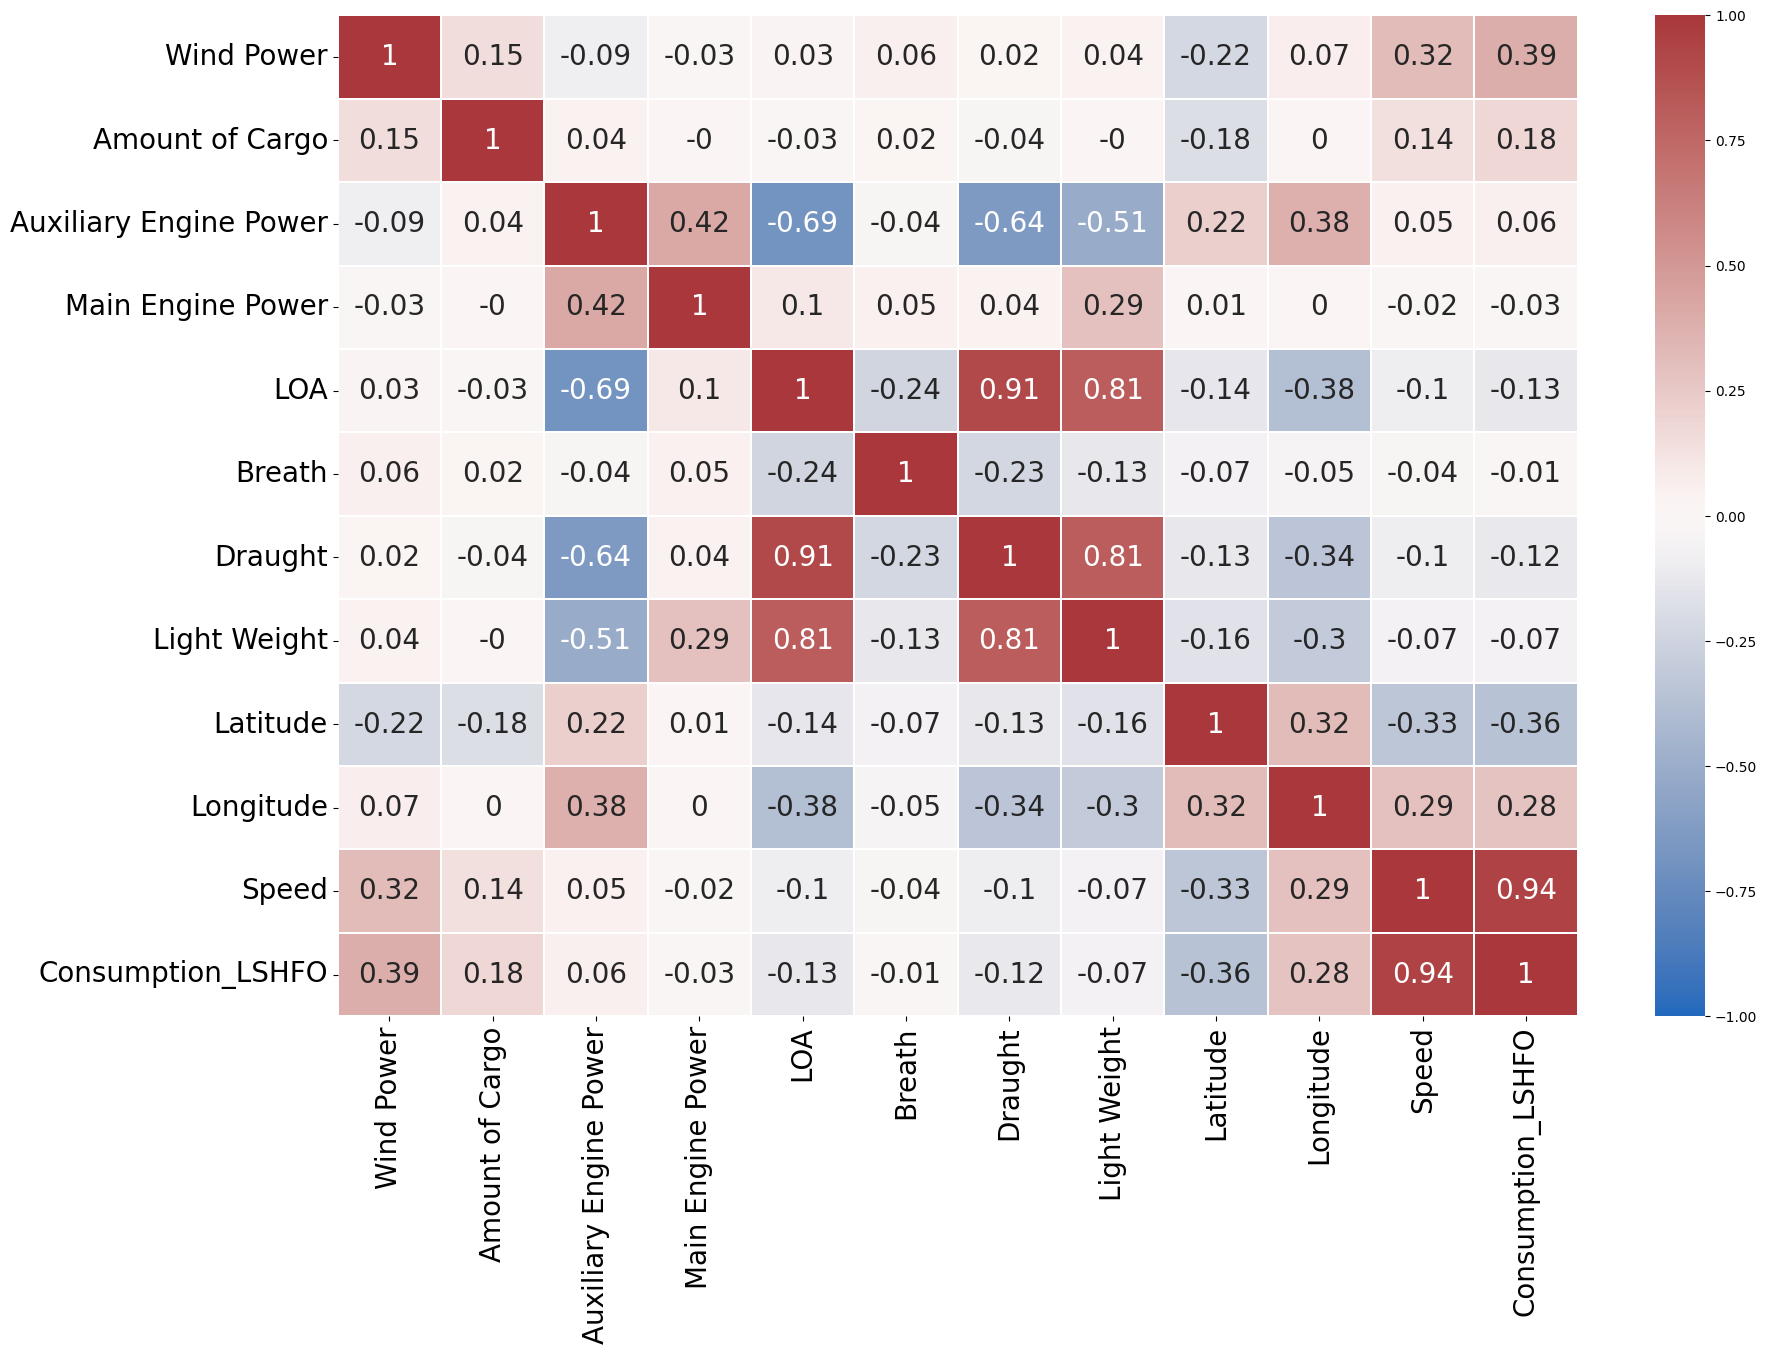

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
l=df.columns.to_list
plt.subplots(figsize=(20,13))
corr = df.corr().round(2)
sns.heatmap(corr, annot=True, vmax=1, vmin=-1 ,center=0, cmap='vlag',annot_kws={"size":20},linewidths=0.2)
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)
plt.show()

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print(X.shape)
print(y.shape)

(10422, 12)
(10422,)


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
l=[8]
for i in range(len(l)):
           X[:,i] = le.fit_transform(X[:,i])
X.shape

(10422, 12)

In [ ]:
l=[8]
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('Country', OneHotEncoder(),l)], remainder='passthrough')
X = ct.fit_transform(X)
X.shape

(10422, 23)

In [ ]:
y.shape

(10422,)

In [ ]:
X

array([[0.0, 0.0, 0.0, ..., 26.995, 56.366, 0.0],
       [0.0, 0.0, 0.0, ..., 26.995, 56.366, 0.0],
       [0.0, 0.0, 0.0, ..., 26.995, 56.366, 0.0],
       ...,
       [0.0, 0.0, 1.0, ..., 33.595, 120.86, 0.0],
       [0.0, 0.0, 1.0, ..., 33.595, 120.86, 0.0],
       [0.0, 0.0, 1.0, ..., 33.595, 120.86, 0.0]], dtype=object)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)
X

array([[-0.29165024, -0.29913807, -0.27746472, ...,  0.53814321,
        -0.33779334, -0.7383823 ],
       [-0.29165024, -0.29913807, -0.27746472, ...,  0.53814321,
        -0.33779334, -0.7383823 ],
       [-0.29165024, -0.29913807, -0.27746472, ...,  0.53814321,
        -0.33779334, -0.7383823 ],
       ...,
       [-0.29165024, -0.29913807,  3.60406184, ...,  0.99800222,
         1.55256245, -0.7383823 ],
       [-0.29165024, -0.29913807,  3.60406184, ...,  0.99800222,
         1.55256245, -0.7383823 ],
       [-0.29165024, -0.29913807,  3.60406184, ...,  0.99800222,
         1.55256245, -0.7383823 ]])

In [ ]:
y

array([2. , 0.4, 0.1, ..., 2.6, 2.6, 2.6])

# KNN)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, cross_val_score
model= KNeighborsRegressor()
kfold=KFold(n_splits=10, random_state=412,shuffle=True)
r_squared=cross_val_score(model, X, y, cv=kfold, scoring='r2')
R_Squared_KNN=r_squared
R_Squared_KNN_mean=R_Squared_KNN.mean()

In [ ]:
kfold=KFold(n_splits=10, random_state=412,shuffle=True)
mae= cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_error')
MAE_KNN=abs(mae)
MAE_KNN_mean=abs(MAE_KNN.mean())

In [ ]:
kfold=KFold(n_splits=10, random_state=412,shuffle=True)
mse=cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
MSE_KNN=abs(mse)
MSE_KNN_mean=MSE_KNN.mean()

# RF)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
kfold=KFold(n_splits=10, random_state=412,shuffle=True)
r_squared=cross_val_score(model, X, y, cv=kfold, scoring='r2')
R_Squared_RF=r_squared
R_Squared_RF_mean=R_Squared_RF.mean()

In [ ]:
kfold = KFold(n_splits=10, random_state=412,shuffle=True)
mae= cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_error')
MAE_RF=abs(mae)
MAE_RF_mean=abs(MAE_RF.mean())

In [ ]:
kfold = KFold(n_splits=10, random_state=412,shuffle=True)
mse=cross_val_score(model, X, y, cv=kfold,scoring='neg_mean_squared_error')
MSE_RF=abs(mse)
MSE_RF_mean=MSE_RF.mean()

# XGBoost)

In [ ]:
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
model = xgb.XGBRegressor()
kfold = KFold(n_splits=10, random_state=412,shuffle=True)
r_squared= cross_val_score(model, X, y, cv=kfold, scoring='r2')
R_Squared_XGBoost=r_squared
R_Squared_XGBoost_mean=R_Squared_XGBoost.mean()

In [ ]:
kfold = KFold(n_splits=10, random_state=412,shuffle=True)
mae= cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_error')
MAE_XGBoost=abs(mae)
MAE_XGBoost_mean=abs(MAE_XGBoost.mean())

In [ ]:
kfold = KFold(n_splits=10, random_state=412,shuffle=True)
mse=cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
MSE_XGBoost=abs(mse)
MSE_XGBoost_mean=MSE_XGBoost.mean()

# DT)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model =DecisionTreeRegressor()
kfold = KFold(n_splits=10, random_state=412,shuffle=True)
r_squared= cross_val_score(model, X, y, cv=kfold, scoring='r2')
R_Squared_DT=r_squared
R_Squared_DT_mean=R_Squared_DT.mean()

In [ ]:
kfold = KFold(n_splits=10, random_state=412,shuffle=True)
mae= cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_error')
MAE_DT=abs(mae)
MAE_DT_mean=abs(MAE_DT.mean())

In [ ]:
kfold = KFold(n_splits=10, random_state=412,shuffle=True)
mse=cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
MSE_DT=abs(mse)
MSE_DT_mean=MSE_DT.mean()

# SVR)

In [ ]:
from sklearn.svm import SVR
model= SVR()
kfold = KFold(n_splits=10, random_state=412,shuffle=True)
r_squared= cross_val_score(model, X, y, cv=kfold, scoring='r2')
R_Squared_SVR=r_squared
R_Squared_SVR_mean=R_Squared_SVR.mean()

In [ ]:
kfold = KFold(n_splits=10, random_state=412,shuffle=True)
mae= cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_error')
MAE_SVR=abs(mae)
MAE_SVR_mean=abs(MAE_SVR.mean())

In [ ]:
kfold = KFold(n_splits=10, random_state=412,shuffle=True)
mse=cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
MSE_SVR=abs(mse)
MSE_SVR_mean=MSE_SVR.mean()

# MLR)

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
kfold = KFold(n_splits=10, random_state=412,shuffle=True)
r_squared= cross_val_score(model, X, y, cv=kfold, scoring='r2')
R_Squared_MLR=r_squared
R_Squared_MLR_mean=R_Squared_MLR.mean()

In [ ]:
kfold = KFold(n_splits=10, random_state=412,shuffle=True)
mae= cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_error')
MAE_MLR=abs(mae)
MAE_MLR_mean=abs(MAE_MLR.mean())

In [ ]:
kfold = KFold(n_splits=10, random_state=412,shuffle=True)
mse=cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
MSE_MLR=abs(mse)
MSE_MLR_mean=MSE_MLR.mean()

# Evaluate)

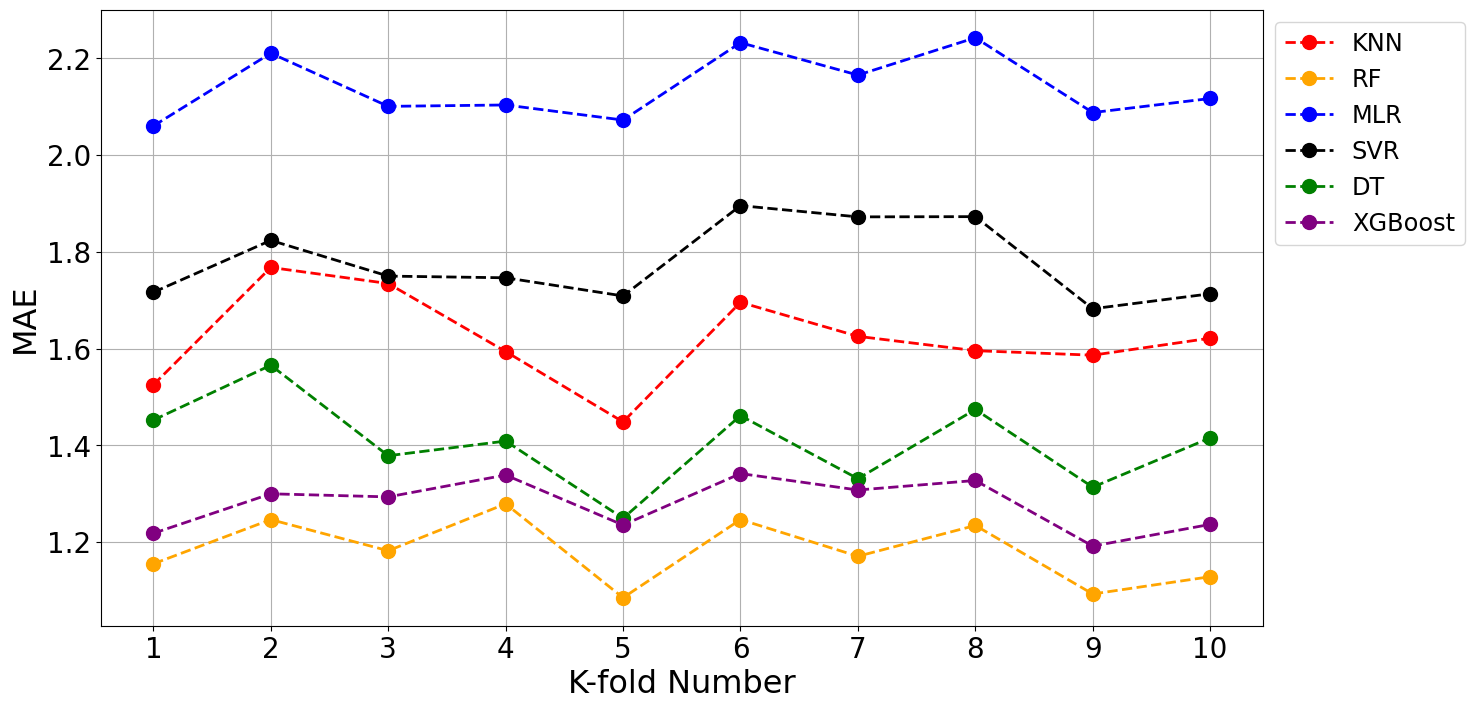

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('xx-large')
fig=plt.figure(figsize=(15,8))
x=np.arange(1,11,1)
p1,=plt.plot(x,MAE_KNN,color='red',marker='o',markersize=10,linestyle='--',linewidth=2,label='KNN')
p2,=plt.plot(x,MAE_RF,color='orange',marker='o',markersize=10,linestyle='--',linewidth=2,label='RF')
p3,=plt.plot(x,MAE_MLR,color='blue',marker='o',markersize=10,linestyle='--',linewidth=2,label='MLR')
p4,=plt.plot(x,MAE_SVR,color='black',marker='o',markersize=10,linestyle='--',linewidth=2,label='SVR')
p5,=plt.plot(x,MAE_DT,color='green',marker='o',markersize=10,linestyle='--',linewidth=2,label='DT')
p6,=plt.plot(x,MAE_XGBoost,color='purple',marker='o',markersize=10,linestyle='--',linewidth=2,label='XGBoost')
plt.xlabel('K-fold Number',fontsize=23)
plt.ylabel('MAE',fontsize=23)
plt.legend(handles=[p1,p2,p3,p4,p5,p6], bbox_to_anchor=(1,1), loc='upper left', prop=fontP,fontsize=8)
plt.grid(which='both')
plt.xticks(np.arange(1,11,1),fontsize=20)
plt.yticks(fontsize=20)
plt.show()

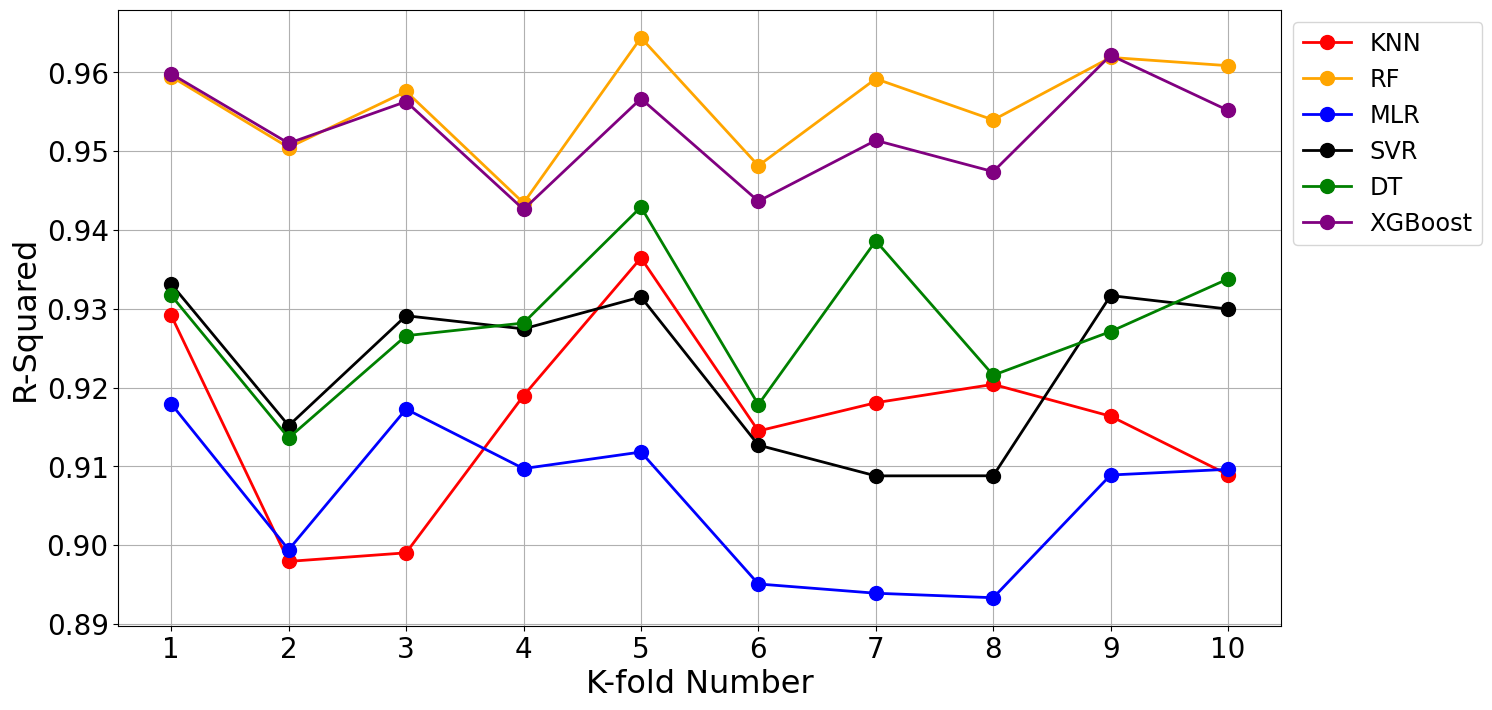

In [ ]:
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('xx-large')
fig=plt.figure(figsize=(15,8))
x=np.arange(1,11,1)
p1,=plt.plot(x,R_Squared_KNN,color='red',marker='o',markersize=10,linewidth=2,label='KNN')
p2,=plt.plot(x,R_Squared_RF,color='orange',marker='o',markersize=10,linewidth=2,label='RF')
p3,=plt.plot(x,R_Squared_MLR,color='blue',marker='o',markersize=10,linewidth=2,label='MLR')
p4,=plt.plot(x,R_Squared_SVR,color='black',marker='o',markersize=10,linewidth=2,label='SVR')
p5,=plt.plot(x,R_Squared_DT,color='green',marker='o',markersize=10,linewidth=2,label='DT')
p6,=plt.plot(x,R_Squared_XGBoost,color='purple',marker='o',markersize=10,linewidth=2,label='XGBoost')
plt.xlabel('K-fold Number',fontsize=23)
plt.ylabel('R-Squared',fontsize=23)
plt.legend(handles=[p1,p2,p3,p4,p5,p6], bbox_to_anchor=(1,1), loc='upper left', prop=fontP,fontsize=8)
plt.grid(which='both')
plt.xticks(np.arange(1,11,1),fontsize=20)
plt.yticks(fontsize=20)
plt.show()

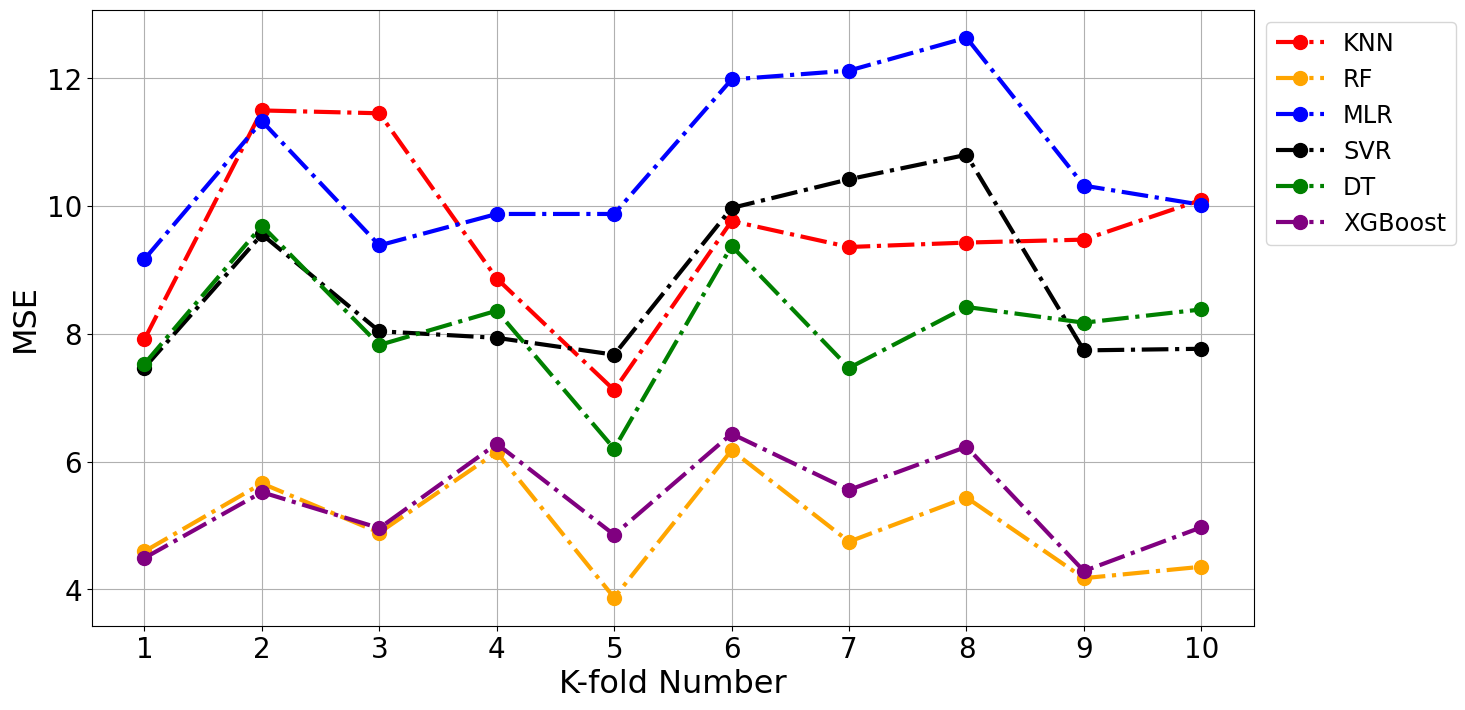

In [ ]:
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('xx-large')
fig=plt.figure(figsize=(15,8))
x=np.arange(1,11,1)
p1,=plt.plot(x,MSE_KNN,color='red',marker='o',markersize=10,linestyle='-.',linewidth=3,label='KNN')
p2,=plt.plot(x,MSE_RF,color='orange',marker='o',markersize=10,linestyle='-.',linewidth=3,label='RF')
p3,=plt.plot(x,MSE_MLR,color='blue',marker='o',markersize=10,linestyle='-.',linewidth=3,label='MLR')
p4,=plt.plot(x,MSE_SVR,color='black',marker='o',markersize=10,linestyle='-.',linewidth=3,label='SVR')
p5,=plt.plot(x,MSE_DT,color='green',marker='o',markersize=10,linestyle='-.',linewidth=3,label='DT')
p6,=plt.plot(x,MSE_XGBoost,color='purple',marker='o',markersize=10,linestyle='-.',linewidth=3,label='XGBoost')
plt.xlabel('K-fold Number',fontsize=23)
plt.ylabel('MSE',fontsize=23)
plt.legend(handles=[p1,p2,p3,p4,p5,p6], bbox_to_anchor=(1,1), loc='upper left', prop=fontP,fontsize=8)
plt.grid(which='both')
plt.xticks(np.arange(1,11,1),fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [ ]:
Algorithms=['XGBoost','RF','DT','KNN','SVR','MLR']
MAE=[round(MAE_XGBoost_mean,2),round(MAE_RF_mean,2),round(MAE_DT_mean,2),round(MAE_KNN_mean,2),round(MAE_SVR_mean,2),round(MAE_MLR_mean,2)]
R_Squared=[round(R_Squared_XGBoost_mean*100,2),round(R_Squared_RF_mean*100,2),round(R_Squared_DT_mean*100,2),round(R_Squared_KNN_mean*100,2),round(R_Squared_SVR_mean*100,2),round(R_Squared_MLR_mean*100,2)]
MSE=[round(MSE_XGBoost_mean,2),round(MSE_RF_mean,2),round(MSE_DT_mean,2),round(MSE_KNN_mean,2),round(MSE_SVR_mean,2),round(MSE_MLR_mean,2)]
my_dict= {'Regression Algorithm':Algorithms,'MAE':MAE,'R-Squared (%)':R_Squared,'MSE':MSE}
my_df1= pd.DataFrame(my_dict, index = np.arange(1,7,1))
my_df1

,Regression Algorithm,MAE,R-Squared (%),MSE
1,XGBoost,1.28,95.26,5.36
2,RF,1.18,95.59,5.00
3,DT,1.41,92.82,8.14
4,KNN,1.62,91.60,9.50
5,SVR,1.78,92.28,8.74
6,MLR,2.14,90.57,10.67


# Grid search with K-fold cross validation for KNN )

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

X_train , X_test , y_train , y_test = train_test_split(X, y)
estimator = KNeighborsRegressor()
param_grid =[{'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 'weights': ['uniform','distance'],'p':[1,2,5]}]
grid = GridSearchCV(estimator, param_grid, n_jobs=-1,cv=10)
grid.fit(X_train, y_train)

print("Best set of hyper parameters: ", grid.best_params_)

Best set of hyper parameters:  {'n_neighbors': 5, 'p': 2, 'weights': 'distance'}


# KNN after tuning hyper parameters)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model= KNeighborsRegressor(n_neighbors= 5, p= 2, weights= 'distance')
from sklearn.model_selection import KFold, cross_val_score
kfold=KFold(n_splits=10, random_state=412,shuffle=True)
r_squared=cross_val_score(model, X, y, cv=kfold, scoring='r2')
R_Squared_KNN=r_squared
R_Squared_KNN_mean=R_Squared_KNN.mean()

In [ ]:
kfold=KFold(n_splits=10, random_state=412,shuffle=True)
mae= cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_error')
MAE_KNN=abs(mae)
MAE_KNN_mean=abs(MAE_KNN.mean())

In [ ]:
kfold=KFold(n_splits=10, random_state=412,shuffle=True)
mse=cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
MSE_KNN=abs(mse)
MSE_KNN_mean=MSE_KNN.mean()

# Grid search with K-fold cross validation for RF )

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X_train , X_test , y_train , y_test = train_test_split(X, y)
estimator = RandomForestRegressor()
param_grid = {
            "n_estimators" : [50,100,150],
            "min_samples_split" : [4,5,6],
            'max_depth': [15,30,45],
            "bootstrap": [True, False],}

grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=10,scoring='neg_mean_absolute_error')
grid.fit(X_train, y_train)

print("Best set of hyperparameters: ", grid.best_params_)

Best set of hyperparameters:  {'bootstrap': True, 'max_depth': 30, 'min_samples_split': 4, 'n_estimators': 150}


# RF after tuning hyper parameters)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(bootstrap= True, max_depth=30, min_samples_split=4, n_estimators= 150)
kfold=KFold(n_splits=10, random_state=412,shuffle=True)
r_squared=cross_val_score(model, X, y, cv=kfold, scoring='r2')
R_Squared_RF=r_squared
R_Squared_RF_mean=R_Squared_RF.mean()

In [ ]:
kfold = KFold(n_splits=10, random_state=412,shuffle=True)
mae= cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_error')
MAE_RF=abs(mae)
MAE_RF_mean=abs(MAE_RF.mean())

In [ ]:
kfold = KFold(n_splits=10, random_state=412,shuffle=True)
mse=cross_val_score(model, X, y, cv=kfold,scoring='neg_mean_squared_error')
MSE_RF=abs(mse)
MSE_RF_mean=MSE_RF.mean()

# Grid search with K-fold cross validation for XGBoost)

In [ ]:
import xgboost as xgb

X_train , X_test , y_train , y_test = train_test_split(X, y)
parameters = {'nthread':[2,3,4],
              'objective':['reg:squarederror'],
              'learning_rate': [0.01,0.05],
              'max_depth': [7,8,9,10],
              'min_child_weight': [4],
              'subsample': [0.5,0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500,1000]}
xgb_model = xgb.XGBRegressor()
grid_search = GridSearchCV(xgb_model, parameters, cv=10,n_jobs = 5)
grid_search.fit(X_train, y_train)

print("Best set of hyperparameters: ",grid_search.best_params_)

Best set of hyperparameters:  {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 10, 'min_child_weight': 4, 'n_estimators': 1000, 'nthread': 2, 'objective': 'reg:squarederror', 'subsample': 0.5}


# XGBoost after tuning hyper parameters)

In [ ]:
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
model = xgb.XGBRegressor(colsample_bytree= 0.7, learning_rate= 0.01, max_depth= 10, min_child_weight= 4, n_estimators= 1000, nthread=2 , objective= 'reg:squarederror', subsample= 0.5)
kfold = KFold(n_splits=10, random_state=412,shuffle=True)
r_squared= cross_val_score(model, X, y, cv=kfold, scoring='r2')
R_Squared_XGBoost=r_squared
R_Squared_XGBoost_mean=R_Squared_XGBoost.mean()

In [ ]:
kfold = KFold(n_splits=10, random_state=412,shuffle=True)
mae= cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_error')
MAE_XGBoost=abs(mae)
MAE_XGBoost_mean=abs(MAE_XGBoost.mean())

In [ ]:
kfold = KFold(n_splits=10, random_state=412,shuffle=True)
mse=cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
MSE_XGBoost=abs(mse)
MSE_XGBoost_mean=MSE_XGBoost.mean()

# Grid search with K-fold cross validation for DT )

In [ ]:
from sklearn.tree import DecisionTreeRegressor
estimator =DecisionTreeRegressor()
X_train , X_test , y_train , y_test = train_test_split(X, y)
param_grid={"max_depth" : [3,5,7,9,11,13],'splitter': ['best']}

grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=10,scoring='neg_mean_absolute_error')
grid.fit(X_train, y_train)

print("Best set of hyperparameters: ", grid.best_params_)

Best set of hyperparameters:  {'max_depth': 13, 'splitter': 'best'}


# DT after tuning hyper parameters )

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model =DecisionTreeRegressor(max_depth = 13, splitter = 'best')
kfold = KFold(n_splits=10, random_state=412,shuffle=True)
r_squared= cross_val_score(model, X, y, cv=kfold, scoring='r2')
R_Squared_DT=r_squared
R_Squared_DT_mean=R_Squared_DT.mean()

In [ ]:
kfold = KFold(n_splits=10, random_state=412,shuffle=True)
mae= cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_error')
MAE_DT=abs(mae)
MAE_DT_mean=abs(MAE_DT.mean())

In [ ]:
kfold = KFold(n_splits=10, random_state=412,shuffle=True)
mse=cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
MSE_DT=abs(mse)
MSE_DT_mean=MSE_DT.mean()

# Grid search with K-fold cross validation for SVR )

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X, y)
from sklearn.svm import SVR
regressor = SVR()
parameters = {'C': [ 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.04, 0.05, 0.06]
               ,'epsilon':[0.01,0.05,0.1],'degree': [1,2,3]}
grid_search = GridSearchCV(estimator = regressor,
                          param_grid = parameters,
                           n_jobs = -1,cv=10)
grid_search.fit(X_train, y_train.ravel())
best_accuracy = grid_search.best_score_
best_prameter = grid_search.best_params_

print("best parameter ", best_prameter)

best parameter  {'C': 1, 'degree': 1, 'epsilon': 0.01, 'gamma': 0.05, 'kernel': 'rbf'}


# SVR after tuning hyper parameters )

In [ ]:
from sklearn.svm import SVR
model= SVR(C= 1, degree= 1, epsilon= 0.01, gamma=0.05, kernel= 'rbf')
kfold = KFold(n_splits=10, random_state=412,shuffle=True)
r_squared= cross_val_score(model, X, y, cv=kfold, scoring='r2')
R_Squared_SVR=r_squared
R_Squared_SVR_mean=R_Squared_SVR.mean()

In [ ]:
kfold = KFold(n_splits=10, random_state=412,shuffle=True)
mae= cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_error')
MAE_SVR=abs(mae)
MAE_SVR_mean=abs(MAE_SVR.mean())

In [ ]:
kfold = KFold(n_splits=10, random_state=412,shuffle=True)
mse=cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
MSE_SVR=abs(mse)
MSE_SVR_mean=MSE_SVR.mean()

# Grid search with K-fold cross validation for MLR )

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X, y)
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
parameters = {"fit_intercept": [True, False],
              'positive':[True, False],'copy_X':[True],
              'n_jobs':[-1,0,1]}

grid = GridSearchCV(estimator=reg, param_grid = parameters, cv = 10)
grid.fit(X_train, y_train)

print("Best set of hyperparameters: ", grid.best_params_)

Best set of hyperparameters:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': False}


# MLR after tuning hyper parameters )

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(fit_intercept= True, n_jobs= -1, positive= False,copy_X= True)
kfold = KFold(n_splits=10, random_state=412,shuffle=True)
r_squared= cross_val_score(model, X, y, cv=kfold, scoring='r2')
R_Squared_MLR=r_squared
R_Squared_MLR_mean=R_Squared_MLR.mean()

In [ ]:
kfold = KFold(n_splits=10, random_state=412,shuffle=True)
mae= cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_error')
MAE_MLR=abs(mae)
MAE_MLR_mean=abs(MAE_MLR.mean())

In [ ]:
kfold = KFold(n_splits=10, random_state=412,shuffle=True)
mse=cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
MSE_MLR=abs(mse)
MSE_MLR_mean=MSE_MLR.mean()

# Re-evaluation)

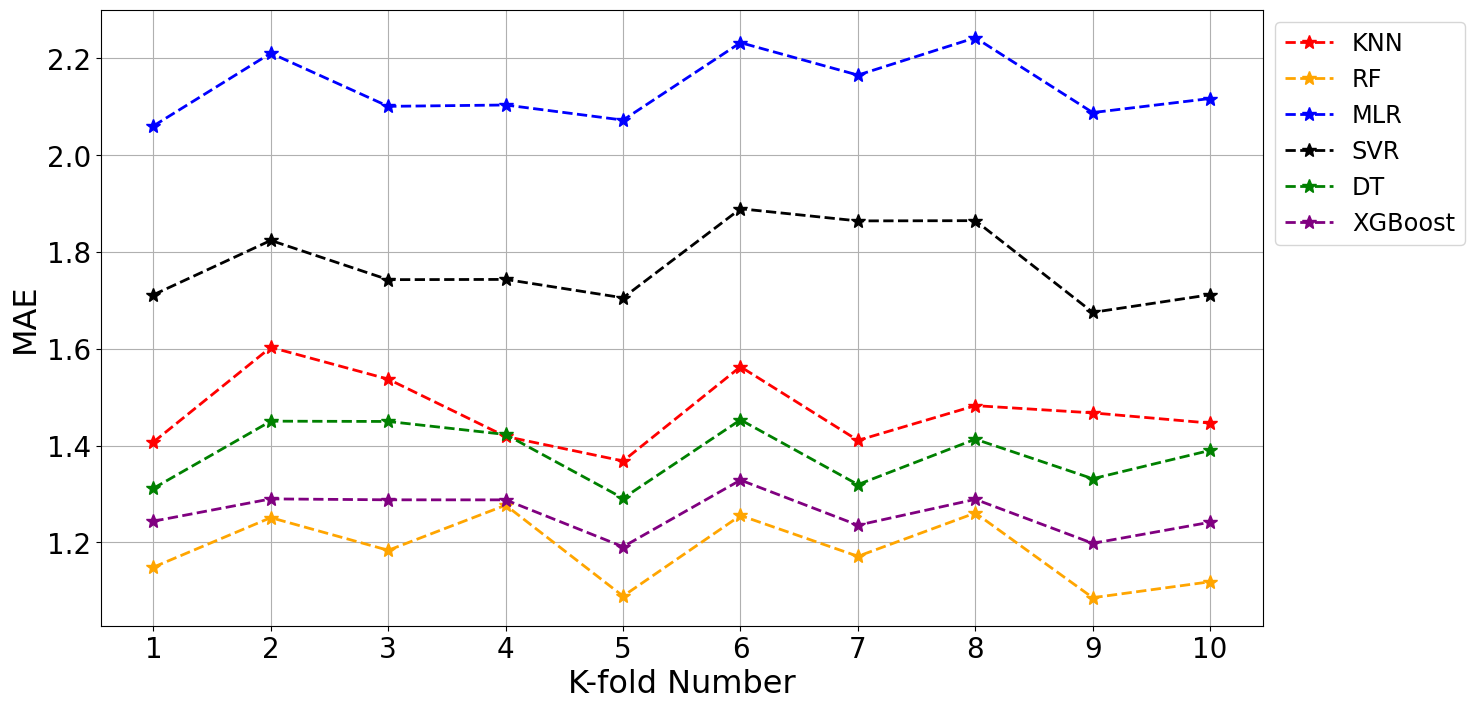

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('xx-large')
fig=plt.figure(figsize=(15,8))
x=np.arange(1,11,1)
p1,=plt.plot(x,MAE_KNN,color='red',marker='*',markersize=10,linestyle='--',linewidth=2,label='KNN')
p2,=plt.plot(x,MAE_RF,color='orange',marker='*',markersize=10,linestyle='--',linewidth=2,label='RF')
p3,=plt.plot(x,MAE_MLR,color='blue',marker='*',markersize=10,linestyle='--',linewidth=2,label='MLR')
p4,=plt.plot(x,MAE_SVR,color='black',marker='*',markersize=10,linestyle='--',linewidth=2,label='SVR')
p5,=plt.plot(x,MAE_DT,color='green',marker='*',markersize=10,linestyle='--',linewidth=2,label='DT')
p6,=plt.plot(x,MAE_XGBoost,color='purple',marker='*',markersize=10,linestyle='--',linewidth=2,label='XGBoost')
plt.xlabel('K-fold Number',fontsize=23)
plt.ylabel('MAE',fontsize=23)
plt.legend(handles=[p1,p2,p3,p4,p5,p6], bbox_to_anchor=(1,1), loc='upper left', prop=fontP,fontsize=8)
plt.grid(which='both')
plt.xticks(np.arange(1,11,1),fontsize=20)
plt.yticks(fontsize=20)
plt.show()

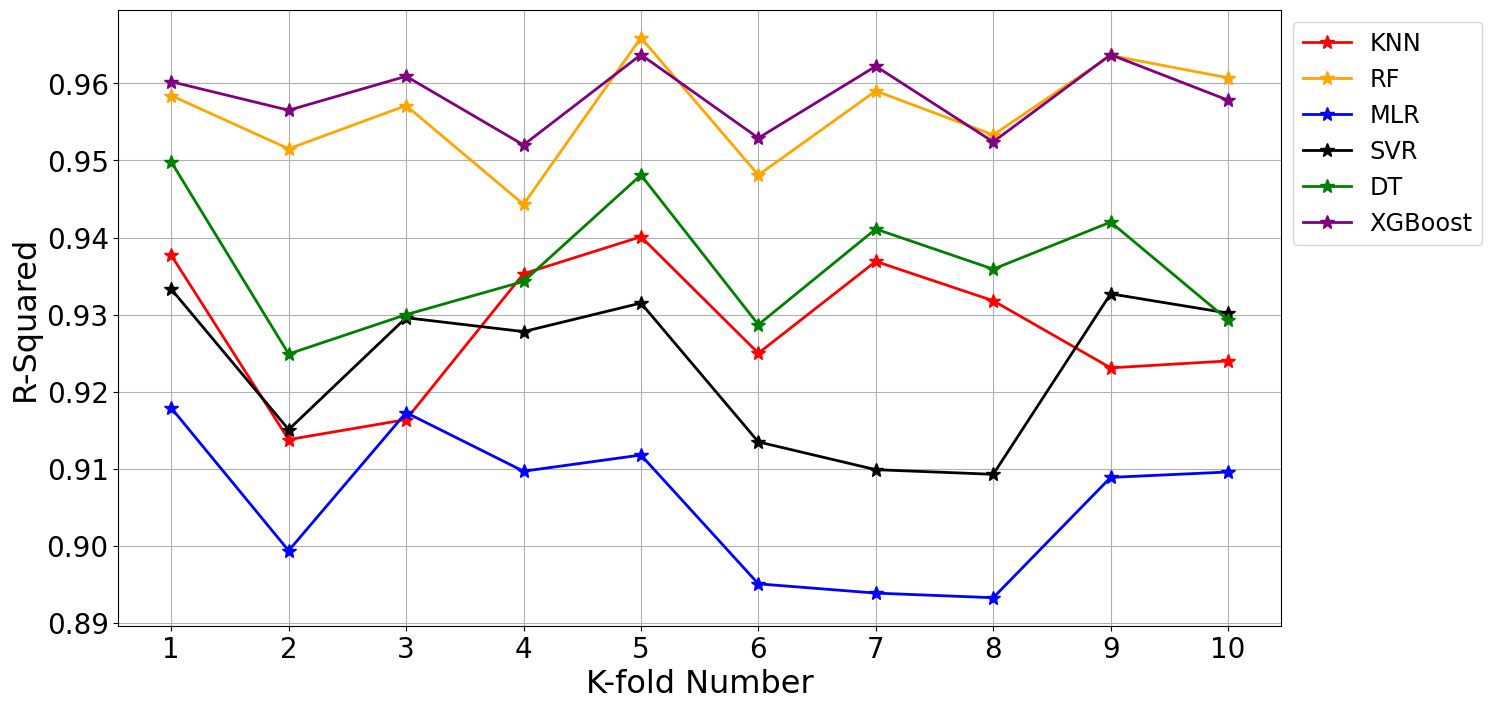

In [ ]:
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('xx-large')
fig=plt.figure(figsize=(15,8))
x=np.arange(1,11,1)
p1,=plt.plot(x,R_Squared_KNN,color='red',marker='*',markersize=10,linewidth=2,label='KNN')
p2,=plt.plot(x,R_Squared_RF,color='orange',marker='*',markersize=10,linewidth=2,label='RF')
p3,=plt.plot(x,R_Squared_MLR,color='blue',marker='*',markersize=10,linewidth=2,label='MLR')
p4,=plt.plot(x,R_Squared_SVR,color='black',marker='*',markersize=10,linewidth=2,label='SVR')
p5,=plt.plot(x,R_Squared_DT,color='green',marker='*',markersize=10,linewidth=2,label='DT')
p6,=plt.plot(x,R_Squared_XGBoost,color='purple',marker='*',markersize=10,linewidth=2,label='XGBoost')
plt.xlabel('K-fold Number',fontsize=23)
plt.ylabel('R-Squared',fontsize=23)
plt.legend(handles=[p1,p2,p3,p4,p5,p6], bbox_to_anchor=(1,1), loc='upper left', prop=fontP,fontsize=8)
plt.grid(which='both')
plt.xticks(np.arange(1,11,1),fontsize=20)
plt.yticks(fontsize=20)
plt.show()

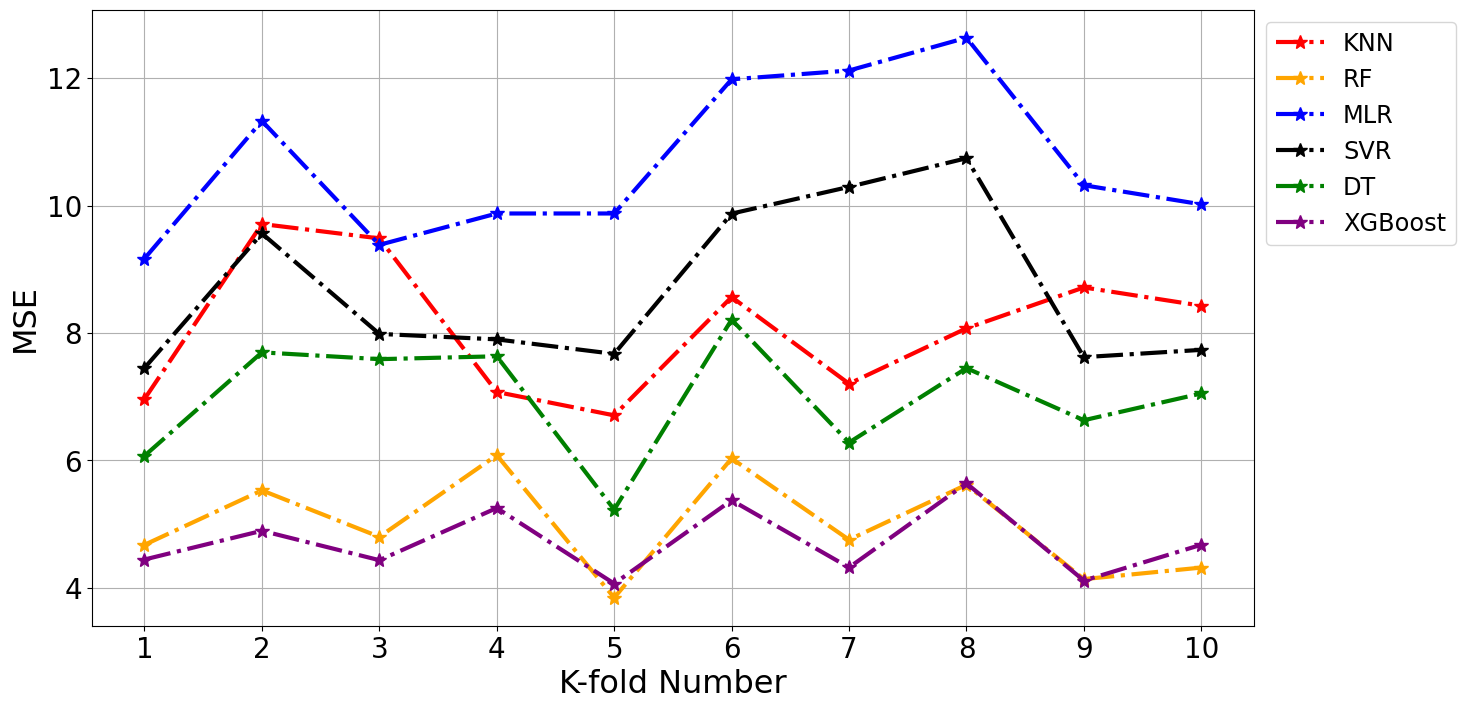

In [ ]:
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('xx-large')
fig=plt.figure(figsize=(15,8))
x=np.arange(1,11,1)
p1,=plt.plot(x,MSE_KNN,color='red',marker='*',markersize=10,linestyle='-.',linewidth=3,label='KNN')
p2,=plt.plot(x,MSE_RF,color='orange',marker='*',markersize=10,linestyle='-.',linewidth=3,label='RF')
p3,=plt.plot(x,MSE_MLR,color='blue',marker='*',markersize=10,linestyle='-.',linewidth=3,label='MLR')
p4,=plt.plot(x,MSE_SVR,color='black',marker='*',markersize=10,linestyle='-.',linewidth=3,label='SVR')
p5,=plt.plot(x,MSE_DT,color='green',marker='*',markersize=10,linestyle='-.',linewidth=3,label='DT')
p6,=plt.plot(x,MSE_XGBoost,color='purple',marker='*',markersize=10,linestyle='-.',linewidth=3,label='XGBoost')
plt.xlabel('K-fold Number',fontsize=23)
plt.ylabel('MSE',fontsize=23)
plt.legend(handles=[p1,p2,p3,p4,p5,p6], bbox_to_anchor=(1,1), loc='upper left', prop=fontP,fontsize=8)
plt.grid(which='both')
plt.xticks(np.arange(1,11,1),fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [ ]:
Algorithms=['XGBoost','RF','DT','KNN','SVR','MLR']
MAE=[round(MAE_XGBoost_mean,2),round(MAE_RF_mean,2),round(MAE_DT_mean,2),round(MAE_KNN_mean,2),round(MAE_SVR_mean,2),round(MAE_MLR_mean,2)]
R_Squared=[round(R_Squared_XGBoost_mean*100,2),round(R_Squared_RF_mean*100,2),round(R_Squared_DT_mean*100,2),round(R_Squared_KNN_mean*100,2),round(R_Squared_SVR_mean*100,2),round(R_Squared_MLR_mean*100,2)]
MSE=[round(MSE_XGBoost_mean,2),round(MSE_RF_mean,2),round(MSE_DT_mean,2),round(MSE_KNN_mean,2),round(MSE_SVR_mean,2),round(MSE_MLR_mean,2)]
my_dict= {'Regression Algorithm':Algorithms,'MAE':MAE,'R-Squared (%)':R_Squared,'MSE':MSE}
my_df2= pd.DataFrame(my_dict, index = np.arange(1,7,1))
my_df2

,Regression Algorithm,MAE,R-Squared (%),MSE
1,XGBoost,1.26,95.82,4.72
2,RF,1.18,95.62,4.98
3,DT,1.38,93.64,6.98
4,KNN,1.47,92.84,8.09
5,SVR,1.77,92.33,8.68
6,MLR,2.14,90.57,10.67


In [ ]:
my_df3=(my_df2.set_index(['Regression Algorithm'])-my_df1.set_index(['Regression Algorithm']))
my_df3

,MAE,R-Squared (%),MSE
Regression Algorithm,,,
XGBoost,-0.02,0.56,-0.64
RF,0.00,0.03,-0.02
DT,-0.03,0.82,-1.16
KNN,-0.15,1.24,-1.41
SVR,-0.01,0.05,-0.06
MLR,0.00,0.00,0.00
